# Problem Statement:
- A mobile phone is a device that can make and receive telephone calls over a radio link while moving around a wide geographic area. They have become so popular these days that one can't imagine life without them. There have been many kind of mobile phones that have been released in to the market with different configurations. 
- So, Here we try to find out the relation between the features and the price of the mobile phone and try to make it easy for anyone who is going to buy a mobile phone by predicting what the price range is for their desired features.
 
- price_range 
    - 0 = low
    - 1 = medium
    - 2 = high
    - 3 = premium

### Importing the required libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
## Reading the dataset
df = pd.read_csv("datasets_11167_15520_train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [41]:
df.shape

(2000, 21)

In [42]:
#Names of the columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

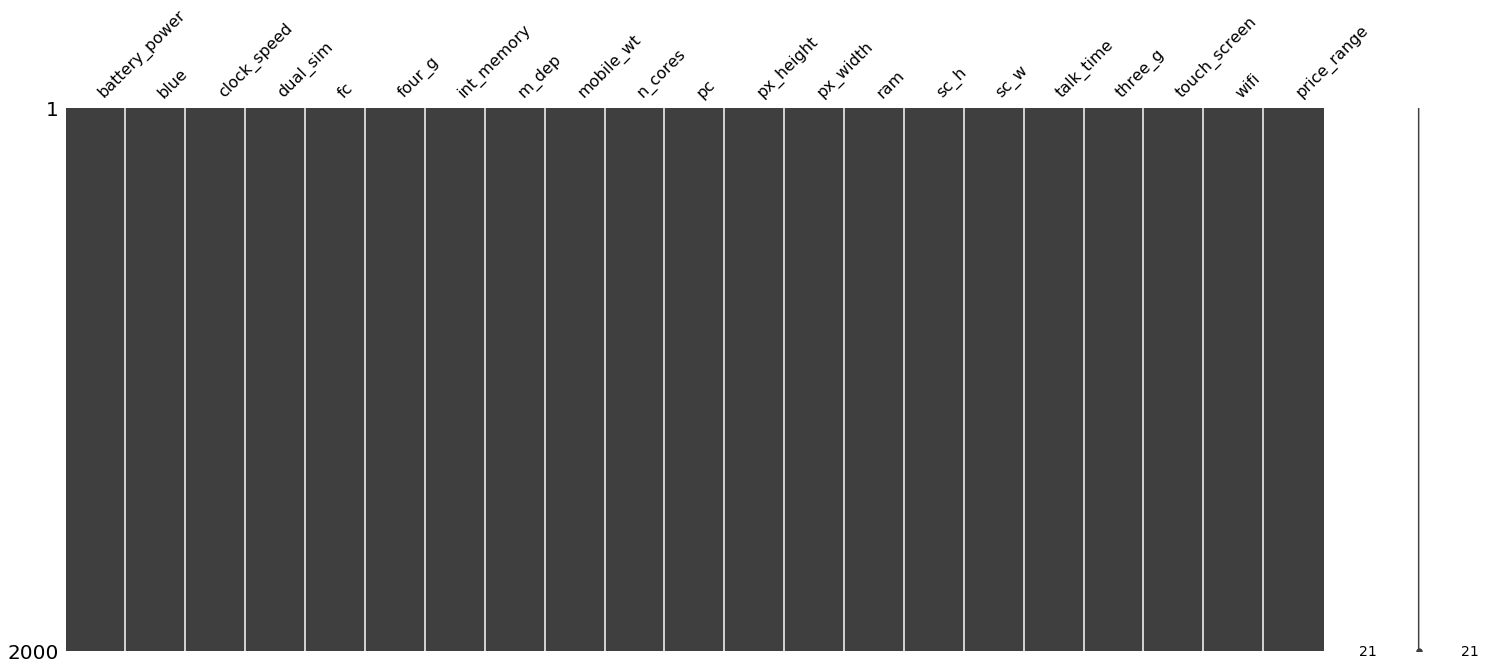

In [43]:
#checking for any null values in the dataset
import missingno as msno
msno.matrix(df)
plt.show()

In [44]:
# null values in each column
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [45]:
# number of duplicated rows in the dataset
df.duplicated().sum()

0

In [46]:
# datatypes of the columns
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [47]:
# Statistical analysis of data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


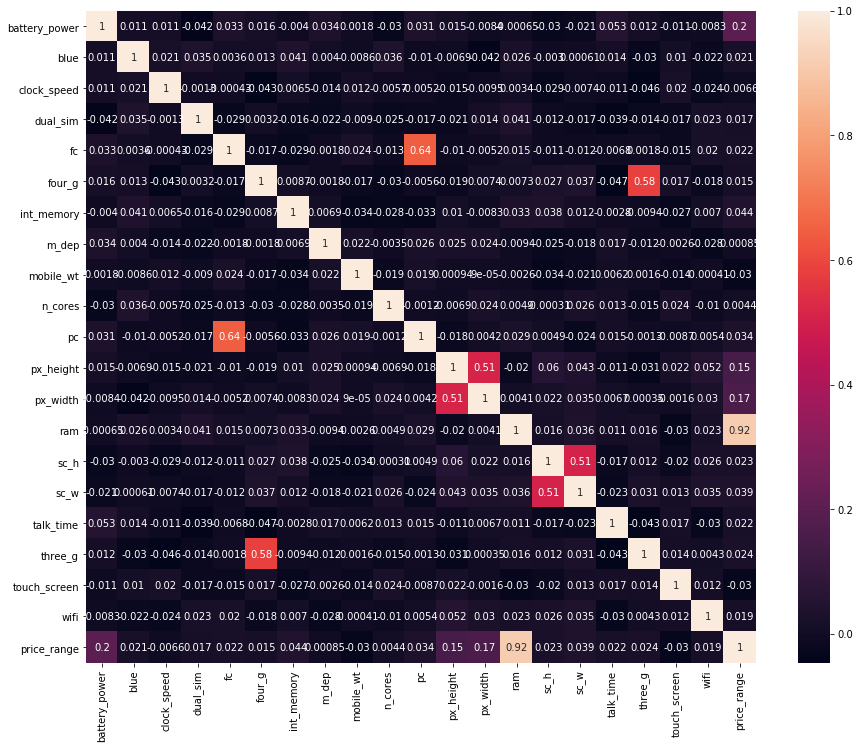

In [48]:
# visualizing the correleation between the columns
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)
plt.show()

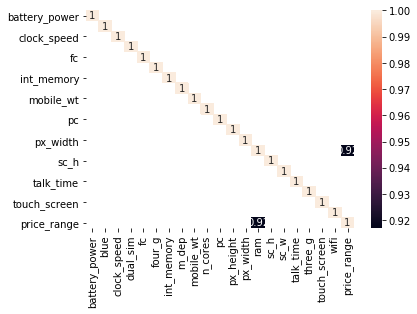

In [49]:
# highly positive correlation
sns.heatmap(df.corr()[df.corr()>=0.7],annot=True)
plt.show()

In [50]:
df1 = df.copy()

In [51]:
# dividing the ram column into ram range and visualising
bin_labels_9 = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500','2500-3000','3000-3500','3500-4000']
cut_bins = [0,500,1000,1500,2000,2500,3000,3500,4000]
df1['ram_range']=pd.cut(df['ram'],cut_bins,labels=bin_labels_9)

In [52]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ram_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,2500-3000
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,2500-3000
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,2500-3000
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,2500-3000
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1000-1500


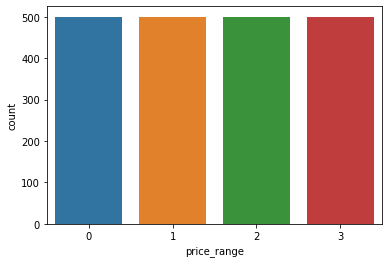

In [53]:
# frequency of the price_range
sns.countplot("price_range",data=df)
plt.show()

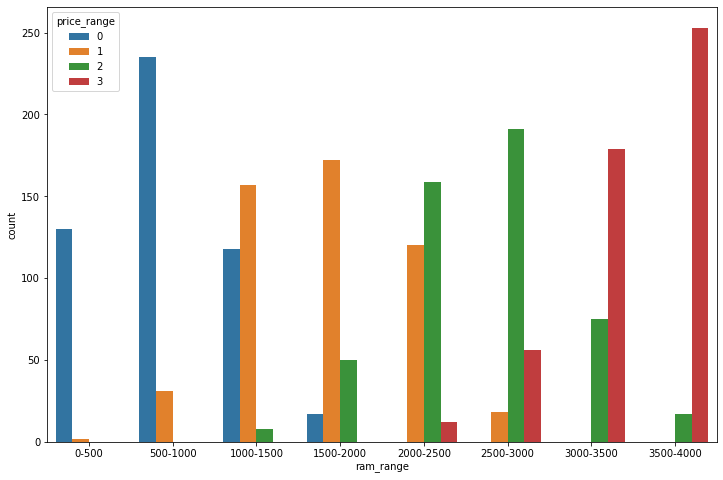

In [54]:
# visualizing ram according to price_range
plt.figure(figsize=(12,8))
sns.countplot("ram_range",data=df1,hue="price_range")
plt.show()

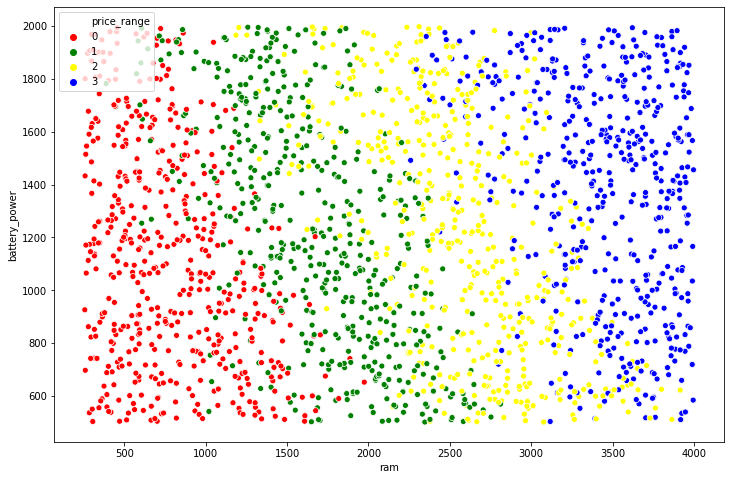

In [55]:
# visualising ram vs battery power according to the price_range
plt.figure(figsize=(12,8))
sns.scatterplot("ram","battery_power",hue="price_range",data=df,palette=['red','green','yellow','blue'])
plt.show()

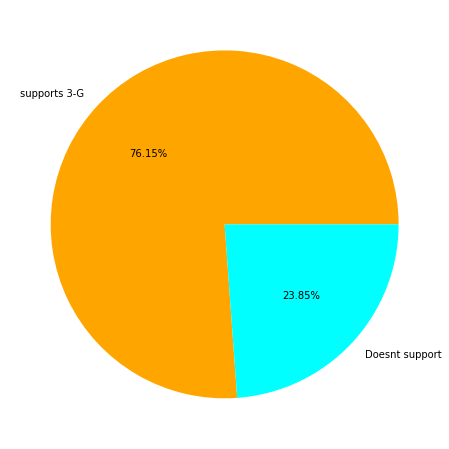

In [56]:
# visualizing the percentage of phones which support 3-g
plt.figure(figsize=(8,8))
label = ["supports 3-G",'Doesnt support']
values=df['three_g'].value_counts().values
plt.pie(values,labels=label,colors=['orange','cyan'],autopct='%1.2f%%')
plt.show()

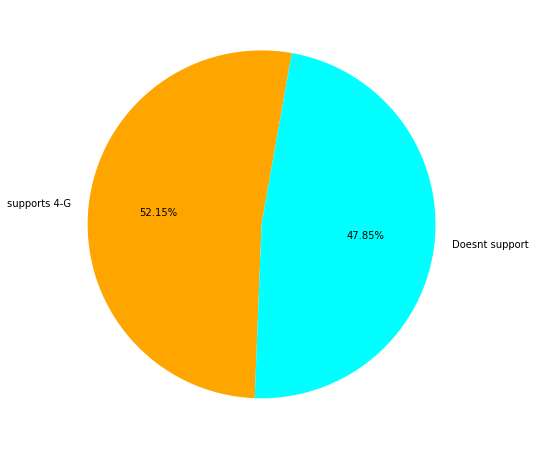

In [57]:
# visualizing the percentage of phones which support 4-g
plt.figure(figsize=(8,8))
label = ["supports 4-G",'Doesnt support']
values=df['four_g'].value_counts().values
plt.pie(values,labels=label,colors=['orange','cyan'],autopct='%1.2f%%',startangle=80)
plt.show()

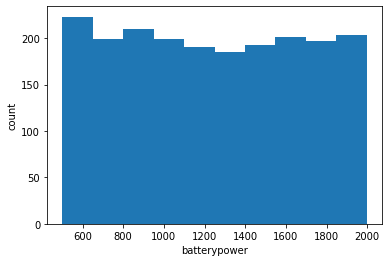

In [58]:
# visualizing the battery power
plt.xlabel("batterypower")
plt.ylabel("count")
plt.hist(df['battery_power'])
plt.show()

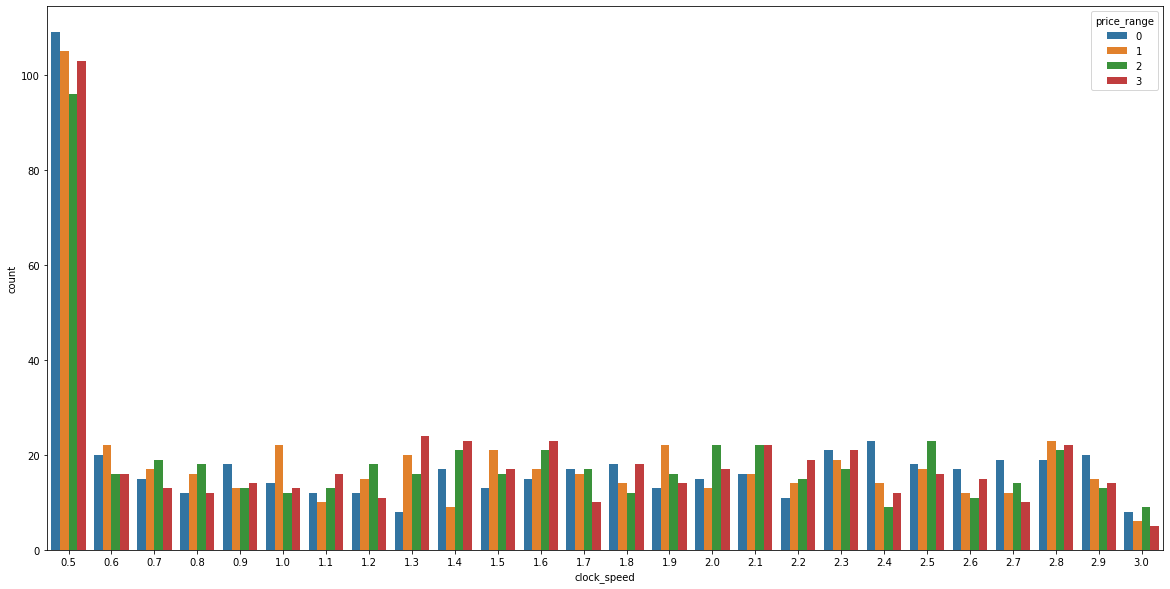

In [59]:
# frequency of clock speed according to their price change
plt.figure(figsize=(20,10))
sns.countplot("clock_speed",data=df,hue="price_range")
plt.show()

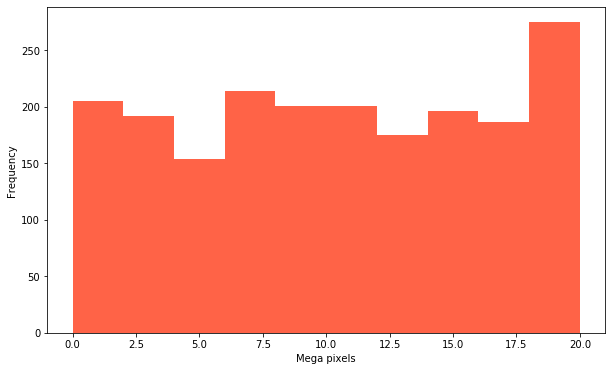

In [60]:
# frequency of the primary camera megapixels
plt.figure(figsize=(10,6))
plt.xlabel("Mega pixels")
plt.ylabel("Frequency")
plt.hist("pc",data=df,bins=10,color="tomato",)
plt.show()

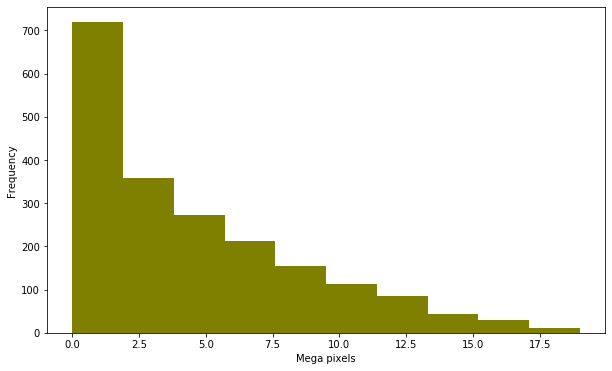

In [61]:
# frequency of the front camera megapixels
plt.figure(figsize=(10,6))
plt.xlabel("Mega pixels")
plt.ylabel("Frequency")
plt.hist("fc",data=df,bins=10,color="olive")
plt.show()

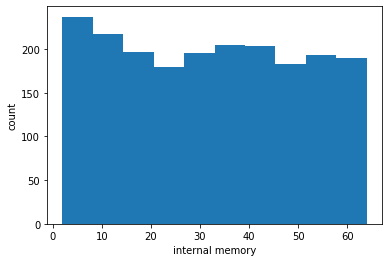

In [62]:
# internal memory
plt.xlabel("internal memory")
plt.ylabel("count")
plt.hist(df['int_memory'])
plt.show()

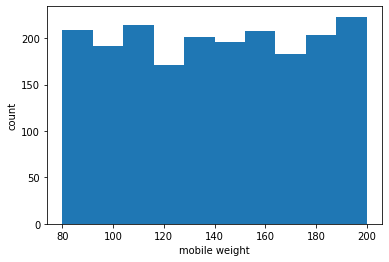

In [63]:
# Mobile weight
plt.xlabel("mobile weight")
plt.ylabel("count")
plt.hist(df['mobile_wt'])
plt.show()

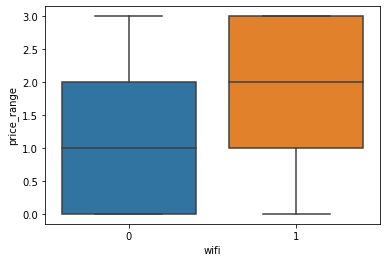

In [64]:
# wifi vs price range
sns.boxplot(df['wifi'],df['price_range'])
plt.show()

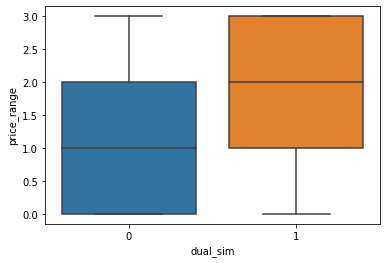

In [65]:
# price range according to dual sim
sns.boxplot(df['dual_sim'],df['price_range'])

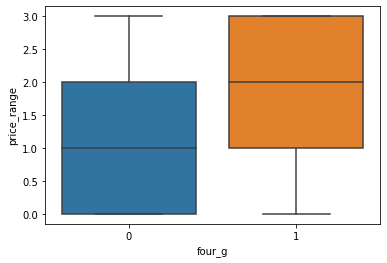

In [66]:
sns.boxplot(df['four_g'],df['price_range'])
plt.show()

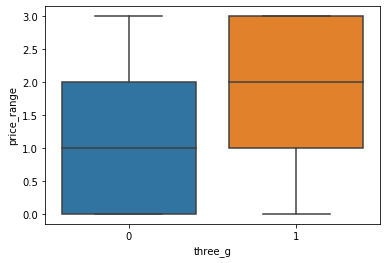

In [67]:
sns.boxplot(df['three_g'],df['price_range'])
plt.show()

## Spliting the dataset

In [68]:
# X-input,y=output
X = df.drop(['price_range'],axis=1)
y = df['price_range']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=18)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

# Scaling for test data
scaled_X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
scaled_X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.380924,-0.981423,-1.267619,0.977748,-0.530357,0.958366,0.102975,1.022485,-1.217939,-0.679028,-0.814322,0.856761,0.263889,1.639434,-0.775934,0.499995,-1.666600,0.551356,-0.988813,0.988813
1,-0.767419,-0.981423,-1.267619,0.977748,1.987658,0.958366,1.361102,1.369973,0.885540,-1.114826,1.306893,0.332430,0.182497,-1.629888,-0.305671,-1.085942,-0.751514,0.551356,1.011314,-1.011314
2,-1.510331,-0.981423,-1.144996,-1.022759,-0.759267,0.958366,0.595286,-0.019981,0.004353,-0.679028,-0.324811,-0.958937,-1.091870,0.416776,-1.246197,-0.179692,1.261674,0.551356,-0.988813,-1.011314
3,-1.476356,-0.981423,1.552719,-1.022759,-0.530357,-1.043443,-0.936348,-1.062446,-1.644320,-0.679028,0.164700,-0.920013,-0.926760,0.421379,-0.070539,0.499995,-1.483583,-1.813710,-0.988813,-1.011314
4,-0.626991,1.018929,-0.041385,0.977748,1.300927,-1.043443,1.032895,-0.714958,0.317032,0.628367,0.980552,-0.203350,-1.468598,0.779522,0.634855,0.046870,-0.751514,0.551356,1.011314,0.988813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.192931,1.018929,1.184849,0.977748,1.300927,0.958366,-0.225232,-1.062446,-0.279901,-0.243230,0.327870,-1.100896,-1.473249,-0.223094,-0.540802,-1.312505,0.712623,0.551356,1.011314,0.988813
396,0.756909,1.018929,-0.899749,0.977748,0.614195,0.958366,-1.319256,1.022485,0.800263,0.192568,-0.324811,-0.150688,-0.036099,1.221447,-1.481328,-0.632817,-0.202463,0.551356,1.011314,0.988813
397,-0.029037,-0.981423,-1.022373,0.977748,0.385285,-1.043443,1.525206,-1.409935,-0.962111,-1.114826,0.817382,-1.448924,0.731312,0.265785,1.105118,1.179682,-0.934531,0.551356,-0.988813,-1.011314
398,0.460198,-0.981423,-1.144996,0.977748,-0.988178,0.958366,1.142298,-0.019981,-0.990536,-1.550625,0.327870,-0.890247,-0.694211,-0.682512,-0.775934,-0.406255,-1.300565,0.551356,1.011314,0.988813


### Logistic regression

In [72]:
# importing the model class
from sklearn.linear_model import LogisticRegression
# creating a object for that model
lm = LogisticRegression()
# fitting the input and output of training data to the object and building the model.
lm.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# predicting the output of the training data
y_train_pred = lm.predict(scaled_X_train)
y_train_pred

array([1, 2, 2, ..., 1, 2, 0])

In [97]:
from sklearn.metrics import accuracy_score
print("Training data accuracy:",accuracy_score(y_train,y_train_pred))
log_train = accuracy_score(y_train,y_train_pred)

Training data accuracy: 0.98125


In [75]:
y_test_pred = lm.predict(scaled_X_test)
y_test_pred

array([3, 0, 1, 1, 2, 1, 3, 0, 0, 3, 3, 1, 2, 2, 3, 2, 2, 0, 0, 1, 3, 1,
       0, 1, 2, 0, 2, 0, 0, 0, 3, 0, 1, 3, 0, 1, 3, 1, 2, 1, 3, 3, 3, 2,
       3, 2, 0, 2, 3, 1, 3, 2, 0, 2, 1, 1, 0, 3, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 2, 3, 0, 2, 2, 3, 0, 2, 0, 0, 3, 0, 2, 1, 3, 3, 2, 0, 0, 1, 2,
       2, 3, 0, 1, 0, 2, 1, 2, 3, 1, 3, 0, 1, 2, 3, 2, 2, 2, 0, 1, 2, 0,
       3, 3, 2, 3, 0, 1, 2, 3, 1, 1, 0, 2, 1, 0, 3, 2, 1, 2, 1, 2, 3, 1,
       2, 0, 3, 1, 2, 3, 0, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 0,
       1, 2, 3, 3, 3, 1, 3, 3, 0, 0, 2, 1, 1, 0, 0, 2, 0, 3, 0, 0, 0, 2,
       2, 0, 3, 1, 2, 1, 2, 1, 3, 0, 3, 2, 2, 3, 1, 2, 0, 2, 3, 2, 1, 3,
       1, 0, 3, 0, 1, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 2, 2, 3, 3, 0,
       0, 0, 0, 3, 2, 1, 3, 2, 0, 2, 0, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       2, 0, 3, 1, 0, 3, 2, 0, 0, 1, 0, 1, 1, 3, 0, 2, 1, 1, 1, 2, 0, 3,
       0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1,
       2, 0, 0, 1, 1, 3, 0, 2, 0, 2, 0, 3, 1, 1, 2,

In [99]:
print("Testing data accuracy:",accuracy_score(y_test,y_test_pred))
log_test = accuracy_score(y_test,y_test_pred)

Testing data accuracy: 0.965


## Random Forest Classification

In [77]:
# importing the model class
from sklearn.ensemble import RandomForestClassifier
# creating a object for that model
rfc = RandomForestClassifier(n_estimators = 100)
# fitting the input and output of training data to the object and building the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
from sklearn.metrics import classification_report
y_pred_train = rfc.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       412

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [79]:
print("Accuracy of the training data=",accuracy_score(y_train,y_pred_train))

Accuracy of the training data= 1.0


In [91]:
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        97
           1       0.85      0.81      0.83       109
           2       0.86      0.80      0.83       106
           3       0.88      0.94      0.91        88

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [92]:
print("Accuracy of the testing data=",accuracy_score(y_test,y_pred_test))

Accuracy of the testing data= 0.8675


In [93]:
## cross validation score.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(scores)

0.875625

In [82]:
# using hyperparameters 
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1)
    }

In [83]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [84]:
# best parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4}

In [94]:
# building the model using the best parameters.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion= 'gini', max_depth= 9, min_samples_leaf= 4)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
#train accuracy after hyper parameter tuning
y_pred_train = rfc.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_pred_train))
ran_train = accuracy_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       412

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [102]:
# test accuracy after hyper parameter tuning
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))
ran_test = accuracy_score(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        97
           1       0.86      0.82      0.84       109
           2       0.86      0.84      0.85       106
           3       0.90      0.93      0.92        88

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.87      0.88      0.87       400



### using gradientboosting classifier

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier(learning_rate=0.5,n_estimators=100)
gdc.fit(X_train,y_train)
y_pred = gdc.predict(X_test)
print("train accuracy: ",accuracy_score(y_train,gdc.predict(X_train)))
print("test accuracy: ",accuracy_score(y_pred,y_test))
grad_train = accuracy_score(y_train,gdc.predict(X_train))
grad_test = accuracy_score(y_pred,y_test)

train accuracy:  1.0
test accuracy:  0.9125


In [105]:
# using xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)
print("train accuracy: ",accuracy_score(y_train,xgb.predict(X_train)))
print("test accuracy: ",accuracy_score(preds,y_test))
xg_train = accuracy_score(y_train,xgb.predict(X_train))
xg_test = accuracy_score(preds,y_test)

train accuracy:  1.0
test accuracy:  0.9


## From all the above models, visualizing the best model.


In [118]:
acc = {'Logistic_train':log_train,'Logistic_test':log_test,'RandomForest_train':ran_train,'RandomForest_test':ran_test,'GradientBoost_train':grad_train,'GradientBoost_test':grad_test,'XGBoost_train':xg_train,'XGBoost_test':xg_test}
x = acc.keys()
y = acc.values()

<BarContainer object of 8 artists>

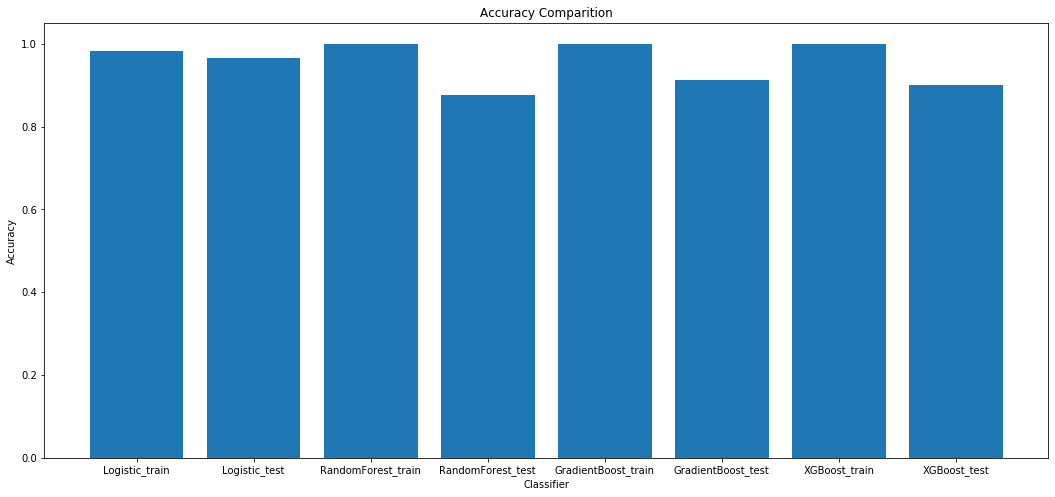

In [124]:
plt.figure(figsize=(18,8))
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparition")
plt.bar(list(x),list(y))

In [125]:
## logisitic regression performed the best.

## Now using logistic regression to predict a sample input.

In [127]:
# building the model.
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
input_sample = [[1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0]]
lm.predict(input_sample)

array([3])

In [ ]:
## we predicted an output of 3 for the sample data that we have given to the model.